# Pymaceuticals Inc.
---

### Analysis

-  Going through the data we first encounter a dupilicate in the data set in muiltipule rows. We dropped this data point form the main data set. Then we created a table of the summary statistics of which we calculated the mean, median, var, std, and sem of the data. Creating a bar chart to see number of timepoints per mouse ID we see Capomulin and Ramicane haveing the most timepoints. The districution between genders of the mice were split pretty mcuh evenly with a litte skwed towards the male side. In the data we can see in our box and whisker plot that capomulin and ramicane are working the best with both have the lowest tumor volumes in the mice. Going into more depth with the capomulin regiemin we see average weight of the mouse translated into higher tumor volumes. We can take from the analyisis that Ramicane by had the greatest potetional with least amount of tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
merged = mouse_metadata.merge(study_results, on='Mouse ID')
merged.to_csv("output.csv", index=False)
merged = merged.dropna(axis=1)
merged = merged.dropna(axis=0)
# Display the data table for preview
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
merged['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Step 1: Check for Duplicate Entries
duplicate_mask = merged.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Step 2: Extract Duplicate Mouse IDs
duplicate_mice = merged[duplicate_mask]['Mouse ID'].unique()

# Display the duplicate Mouse IDs
duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged[merged['Mouse ID'].isin(duplicate_mice)]
print("Data for Duplicate Mouse ID(s):")
duplicate_data

Data for Duplicate Mouse ID(s):


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Create a clean DataFrame by dropping duplicate mouse entries based on 'Mouse ID' and 'Timepoint'

cleaned_df = merged.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
# Display the first few rows of the cleaned DataFrame for preview

cleaned_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Step 1: Group by 'Drug Regimen' and calculate summary statistics
summary_stats = merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Step 2: Rename the columns for clarity
summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Variance Tumor Volume',
    'std': 'Standard Deviation Tumor Volume',
    'sem': 'SEM Tumor Volume'}, inplace=True)

# Step 3: Display the summary statistics DataFrame
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

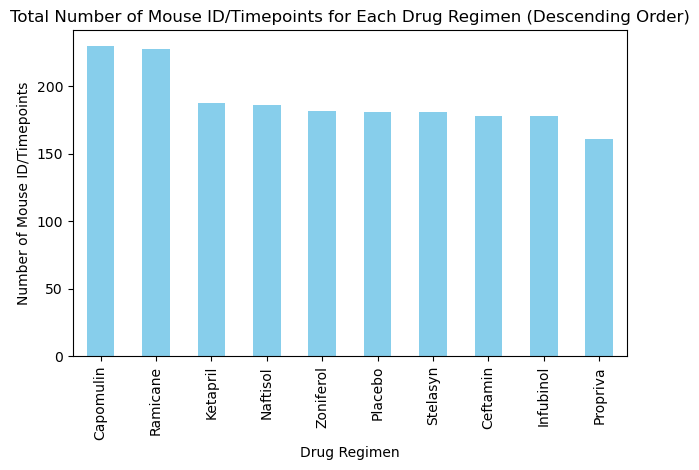

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group by 'Drug Regimen' and count the number of rows (Mouse ID/Timepoints) for each regimen
regimen_counts = merged.groupby('Drug Regimen').count()['Mouse ID']

# Sort the data in descending order
regimen_counts_sorted = regimen_counts.sort_values(ascending=False)

# Create a bar plot
regimen_counts_sorted.plot(kind='bar', color='skyblue')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen (Descending Order)')

# Display the plot
plt.tight_layout()
plt.show()


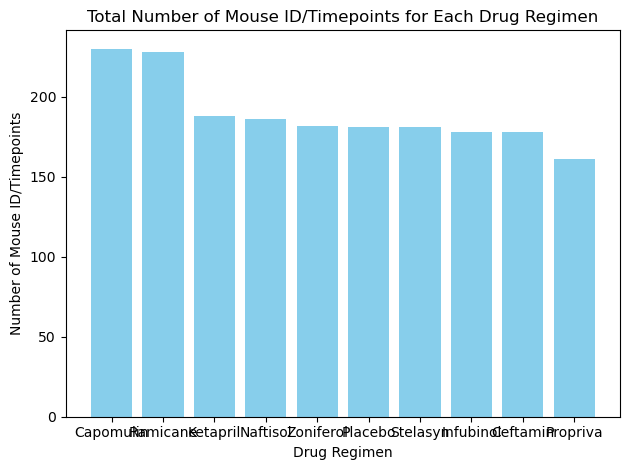

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group by 'Drug Regimen' and count the number of rows (Mouse ID/Timepoints) for each regimen
regimen_counts = merged['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure()
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')

# Display the plot
plt.tight_layout()
plt.show()

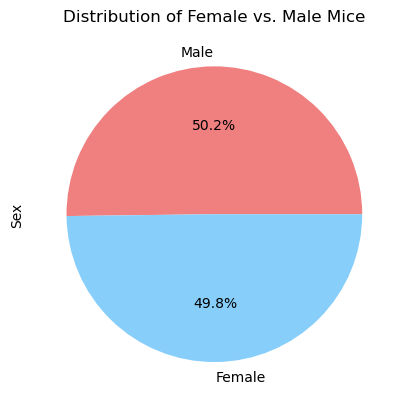

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Get the distribution of female versus male mice
gender_distribution = mouse_metadata['Sex'].value_counts()

# Create a pie plot using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'],)

# Set plot title
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.show()

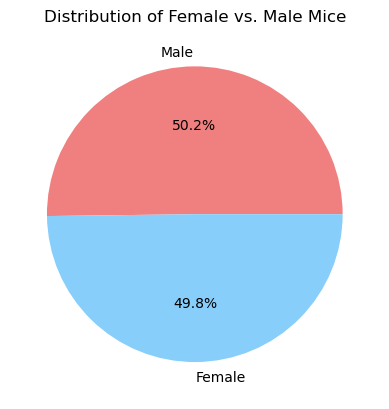

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create a pie plot using pyplot
plt.figure()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])

# Set plot title
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Filter the DataFrame for the four specified treatment regimens
four_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = merged[merged['Drug Regimen'].isin(four_treatments)]

# Get the last (greatest) timepoint for each mouse
last_timepoints = final_tumor_volume_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(final_tumor_volume_df, last_timepoints, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the DataFrame with the final tumor volume of each mouse for the specified treatment regimens
print(final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])
#final_tumor_volume_df


   Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0      k403     Ramicane         45           22.050126
1      s185    Capomulin         45           23.343598
2      x401    Capomulin         45           28.484033
3      m601    Capomulin         45           28.430964
4      g791     Ramicane         45           29.128472
..      ...          ...        ...                 ...
95     x822     Ceftamin         45           61.386660
96     y163    Infubinol         45           67.685569
97     y769     Ceftamin         45           68.594745
98     y865     Ceftamin         45           64.729837
99     z581    Infubinol         45           62.754451

[100 rows x 4 columns]


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = final_tumor_volume_df['Drug Regimen'].unique().tolist()

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments_list:
    # Locate the rows containing mice for each drug regimen and get their tumor volumes
    tumor_volumes = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # Add the tumor volume data to the list for plotting
    tumor_vol_data.append(tumor_volumes)

    # Calculate the IQR for the current treatment
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1

    # Determine the upper and lower bounds for potential outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify potential outliers for the current treatment
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    # Print the results for the current treatment
    print(f"-----------------------")
    print(f"Treatment: {treatment}")
    print(f"-----------------------")
    print(f"Lower Quartile (Q1): {Q1}")
    print(f"Upper Quartile (Q3): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound (Potential Outlier): {lower_bound}")
    print(f"Upper Bound (Potential Outlier): {upper_bound}")
    print(f"Potential Outliers: {outliers}\n")

-----------------------
Treatment: Ramicane
-----------------------
Lower Quartile (Q1): 31.56046955
Upper Quartile (Q3): 40.65900627
IQR: 9.098536719999998
Lower Bound (Potential Outlier): 17.912664470000003
Upper Bound (Potential Outlier): 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

-----------------------
Treatment: Capomulin
-----------------------
Lower Quartile (Q1): 32.37735684
Upper Quartile (Q3): 40.1592203
IQR: 7.781863460000004
Lower Bound (Potential Outlier): 20.70456164999999
Upper Bound (Potential Outlier): 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

-----------------------
Treatment: Infubinol
-----------------------
Lower Quartile (Q1): 54.04860769
Upper Quartile (Q3): 65.52574285
IQR: 11.477135160000003
Lower Bound (Potential Outlier): 36.83290494999999
Upper Bound (Potential Outlier): 82.74144559000001
Potential Outliers: 58    36.321346
Name: Tumor Volume (mm3), dtype: float64

------

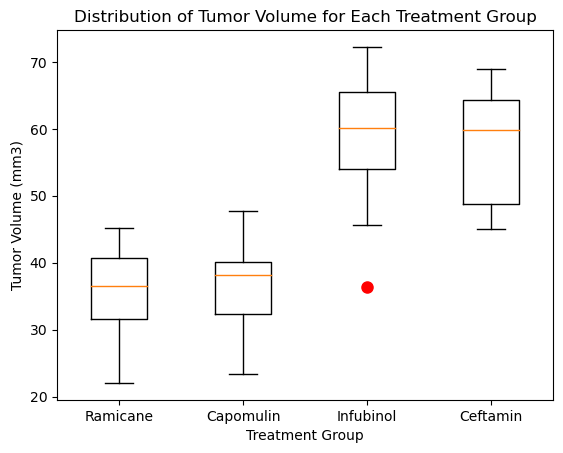

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create the box plot using pyplot
plt.figure()
plt.boxplot(tumor_vol_data, labels=treatments_list, flierprops=dict(marker='o', markersize=8, markerfacecolor='red', markeredgecolor='red'))

# Set plot labels and title
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Display the plot
plt.show()


## Line and Scatter Plots

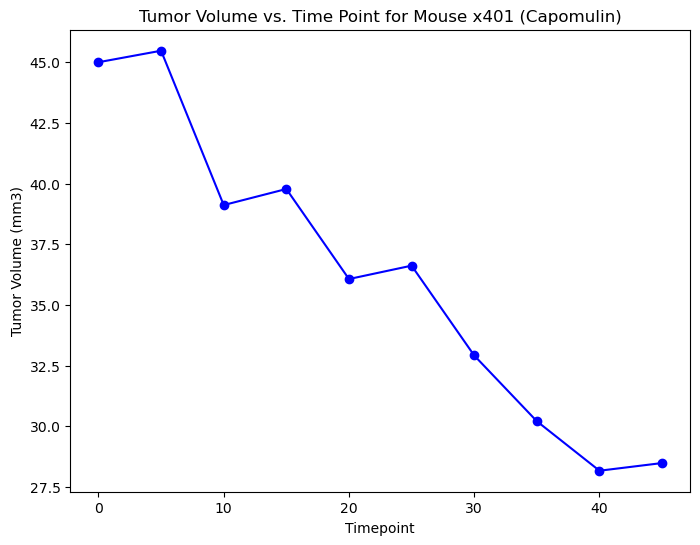

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Step 1: Filter the DataFrame for mice treated with Capomulin
capomulin_data = merged[merged['Drug Regimen'] == 'Capomulin']

# Step 2: Choose a single mouse treated with Capomulin (replace 'abc123' with the actual Mouse ID)
selected_mouse_id = 'x401'
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse_id]

# Check if the selected mouse data is not empty
if selected_mouse_data.empty:
    print(f"Error: Mouse ID {selected_mouse_id} not found in Capomulin-treated mice.")
else:
    # Step 3: Create the line plot
    plt.figure(figsize=(8, 6))
    plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')

    # Set plot labels and title
    plt.xlabel('Timepoint')
    plt.ylabel('Tumor Volume (mm3)')
    plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin)')

    # Display the plot
    plt.show()


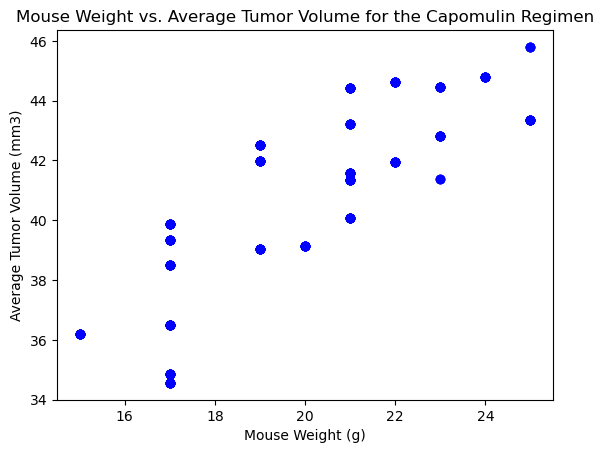

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Step 1: Calculate the average observed tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_tumor_volume = average_tumor_volume.reset_index()  # Reset the index to convert the grouped data to a DataFrame

# Step 2: Merge the data to get both weight and average tumor volume in a single DataFrame
merged_data = capomulin_data.merge(average_tumor_volume, on='Mouse ID', suffixes=('', '_avg'))

# Step 3: Create the scatter plot
plt.figure()
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_avg'], color='blue')

# Set plot labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen')

# Display the plot
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.8343958614425967


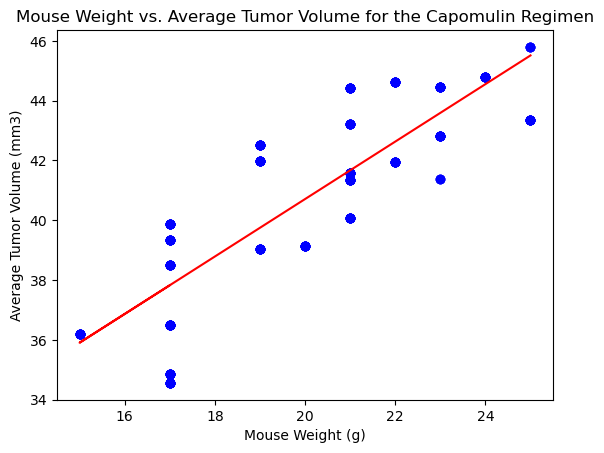

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Step 1: Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient, _ = st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_avg'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Step 2: Create the linear regression model
slope, intercept, _, _, _ = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_avg'])

# Step 3: Create the scatter plot with the linear regression line
plt.figure()
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_avg'], color='blue')
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red')

# Set plot labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen')

# Display the plot
plt.show()
